In [25]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')
from sklearn.datasets import load_iris

In [26]:
df=load_iris()

In [27]:
df.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [28]:
df.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [29]:
feature=pd.DataFrame(df.data)
target=pd.DataFrame(df.target)
data=pd.concat([feature,target],axis=1)
data


,0,1,2,3,0
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [31]:
model=LogisticRegression()

In [32]:
x_train,x_test,y_train,y_test=train_test_split(feature,target,test_size=0.2,random_state=41)

In [33]:
model.fit(feature,target)

LogisticRegression()

In [34]:
test_predict=model.predict(x_test)
prediction=pd.DataFrame(test_predict,columns=
                        ['prediction']).reset_index(drop=True)
target_test=pd.DataFrame(y_test).reset_index(drop=True)

In [35]:
pd.concat([target_test,prediction],axis=1).reset_index(drop=True)


,0,prediction
0,2,2
1,2,2
2,2,2
3,1,1
4,2,2
5,1,1
6,2,2
7,1,1
8,2,2
9,2,2


In [36]:
model.score(x_test,y_test)

0.9666666666666667

In [37]:
from sklearn.metrics import confusion_matrix

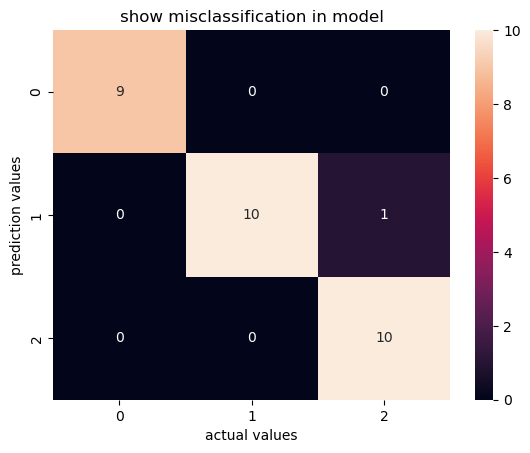

In [38]:
cm=confusion_matrix(y_test,prediction)
sns.heatmap(cm,annot=True)
plt.xlabel('actual values')
plt.ylabel('prediction values')
plt.title('show misclassification in model')
plt.show()

In [39]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,classification_report,f1_score
from sklearn.feature_selection import SelectKBest,chi2

In [40]:
data=pd.read_csv('../data/heart.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [41]:
x=data.iloc[:, :-1]
y=data.iloc[:,-1]

In [42]:
scale=StandardScaler()
x_new=scale.fit_transform(x)

In [43]:
x_train,x_test,y_train,y_test=train_test_split(x_new,y,test_size=0.2,random_state=41)

In [44]:
model=LogisticRegression(penalty='l2',C=0.8,max_iter=1000)

In [45]:
cv=cross_val_score(model,x_train,y_train,cv=5 ,scoring='accuracy')
np.mean(cv)

0.8262755102040815

In [46]:
model.fit (x_new,y)

LogisticRegression(C=0.8, max_iter=1000)

In [47]:
model.score(x_train,y_train)

0.859504132231405

In [48]:
model.score(x_test,y_test)

0.819672131147541

In [49]:
y_pred=model.predict(x_test)

In [52]:
y_pred[:10]

array([0, 0, 0, 0, 1, 1, 0, 1, 0, 1], dtype=int64)

In [61]:
model.predict_proba(x_test)[:10]

array([[0.76159096, 0.23840904],
       [0.94223972, 0.05776028],
       [0.88908041, 0.11091959],
       [0.98823293, 0.01176707],
       [0.31080583, 0.68919417],
       [0.12597332, 0.87402668],
       [0.77668312, 0.22331688],
       [0.01051989, 0.98948011],
       [0.98790353, 0.01209647],
       [0.01942984, 0.98057016]])

In [53]:
y_test[:10]

294    0
249    0
227    0
255    0
228    0
87     1
289    0
16     1
220    0
14     1
Name: target, dtype: int64

In [54]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.84      0.81      0.83        32\n           1       0.80      0.83      0.81        29\n\n    accuracy                           0.82        61\n   macro avg       0.82      0.82      0.82        61\nweighted avg       0.82      0.82      0.82        61\n'

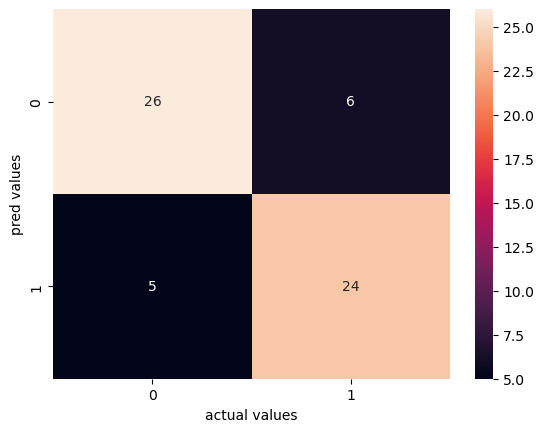

In [60]:
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)
plt.xlabel('actual values')
plt.ylabel('pred values')
plt.show()